<a href="https://colab.research.google.com/github/Dyouvrean/STATS-503-Project/blob/Ranyun/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3 as sql
import seaborn as sns
import missingno as msno
from collections import Counter
import xml.etree.ElementTree as ET
pd.options.display.max_seq_items = 2000

# Load Data


*   tables_names - list all the table name in the database
*   League - league and country info
*   Match - Match table with 115 variables
*   Player - information about Player 



In [ ]:
database = '/content/drive/MyDrive/STATS503/Project/database.sqlite'
conn = sql.connect(database)


tables_names = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables_names

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [ ]:
league=pd.read_sql("""SELECT *
                        FROM Country C, League L
                        WHERE C.id= L.country_id;""", conn)
league= league.loc[:,~ league.columns.duplicated()].copy()
league

,id,name,country_id
0,1,Belgium,1
1,1729,England,1729
2,4769,France,4769
3,7809,Germany,7809
4,10257,Italy,10257
5,13274,Netherlands,13274
6,15722,Poland,15722
7,17642,Portugal,17642
8,19694,Scotland,19694
9,21518,Spain,21518


In [ ]:
Match = pd.read_sql("""SELECT * , C.name country, L.name League
                       FROM  Match M ,Country C, League L
                       WHERE C.id= L.country_id AND 
                             M.country_id=C.id AND M.league_id= L.id
                       ;""", conn)
Match = Match.loc[:,~Match.columns.duplicated()].copy()
Match.columns

Index(['id', 'country_id', 'league_id', 'season', 'stage', 'date',
       'match_api_id', 'home_team_api_id', 'away_team_api_id',
       'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2',
       'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6',
       'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10',
       'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3',
       'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7',
       'away_player_X8', 'away_player_X9', 'away_player_X10',
       'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3',
       'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7',
       'home_player_Y8', 'home_player_Y9', 'home_player_Y10',
       'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3',
       'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7',
       'away_player_Y8', 'away_

In [ ]:
Player = pd.read_sql("""SELECT DISTINCT * 
                       FROM  Player P, Player_Attributes PA
                       WHERE P.player_api_id= PA.player_api_id
                       ;""", conn)
Player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id,player_fifa_api_id,player_api_id,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183974,102359,39902,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183975,102359,39902,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183976,102359,39902,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183977,102359,39902,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [ ]:
Player = Player .loc[:,~Player .columns.duplicated()].copy()
Player.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight', 'date', 'overall_rating', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

# EDA

## Get the formation of team 
* get formation of the team 
* get the result of each match 
* process the xml string to list of dictionary structure

### Get the formation of the team 

In [129]:
Match.columns

Index(['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id',
       'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_1',
       'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5',
       'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9',
       'home_player_10', 'home_player_11', 'away_player_1', 'away_player_2',
       'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6',
       'away_player_7', 'away_player_8', 'away_player_9', 'away_player_10',
       'away_player_11', 'goal', 'shoton', 'shotoff', 'foulcommit', 'card',
       'cross', 'corner', 'possession', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD',
       'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA',
       'BSH', 'BSD', 'BSA', 'name', 'country', 'League', 'home_form',
       'away_form', 'result'],
      dtype='object')

In [ ]:
def get_formation(row,home):
    home_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    away_players_y = [row['home_player_Y%d' % i] for i in range(1,12)]
    formations = [None] * 2
    players_y=[home_players_y,away_players_y]
    for i in range(2):
        formation_dict=Counter(players_y[i]);
        sorted_keys = sorted(formation_dict)
        formation = ''
        for key in sorted_keys[1:-1]:
            y = formation_dict[key]
            formation += '%d-' % y
        formation += '%d' % formation_dict[sorted_keys[-1]] 
        formations[i] = formation
    return formations[home]

In [ ]:
Match["home_form"]=Match.apply(lambda row: get_formation(row,0),axis=1)
Match["away_form"]=Match.apply(lambda row: get_formation(row,1),axis=1)
Match=Match.drop(['home_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_Y%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['home_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['away_player_X%d' % i for i in range(1,12)],axis=1)
Match=Match.drop(['country_id','league_id'],axis=1)

### Get the result of each match

In [ ]:
# assign match result by comparing the goals of home team and away team 
def match_result(row):
    if row['home_team_goal']> row['away_team_goal']:
      return "HOME"
    elif row['home_team_goal']<row['away_team_goal']:
      return "AWAY"
    else:
      return "DRAW"

In [ ]:
Match['result']= Match.apply(lambda row: match_result(row),axis=1)

### process the xml string to list of dictionary structure

In [ ]:
def converter(xml_string):
    if xml_string:
       tree = ET.ElementTree(ET.fromstring(xml_string))
       root=tree.getroot()
       data = []

            
       for child in root:
           element_data = {}
           for subelement in child:
               element_data[subelement.tag] = subelement.text
           data.append(element_data)
       return data
    return xml_string

In [ ]:
Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']]=Match[['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession']].applymap(converter)

## imputation missing value

In [ ]:
Match.isna().sum()[Match.isna().sum( )!=0]

<Axes: >

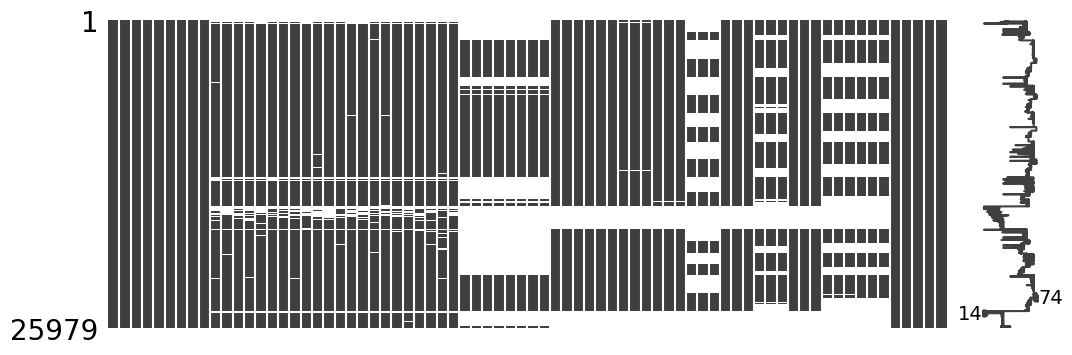

In [ ]:
msno.matrix(Match, figsize=(12,4))

<Axes: >

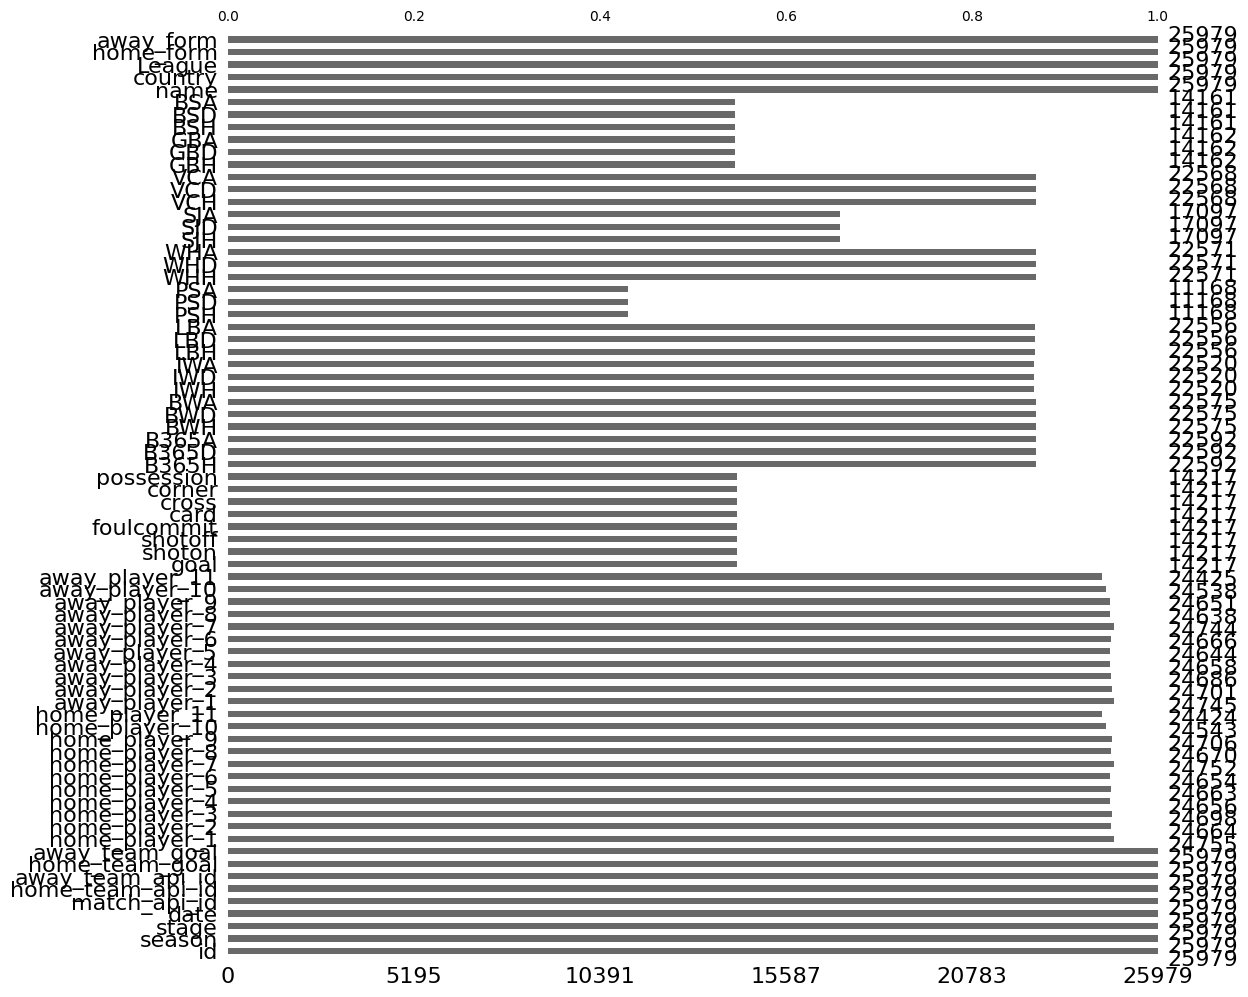

In [ ]:
msno.bar(Match, figsize=(12,12))

### Delete the variables missing over 50% of records

In [ ]:
null_list= Match.isnull().sum()
total_obs= len(Match)
radio=0.5
to_be_drop=null_list[null_list>total_obs*radio]
to_be_drop.index
Match=Match.drop(to_be_drop.index,axis=1)
Match.isna().sum()[Match.isna().sum( )!=0]

### Drop the rows where players are missing 
From the graph above, the players with missing value is clustered, it is safe to drop the row.

In [ ]:
Match=Match.dropna(subset = ['home_player_%d' % i for i in range(1,12)]+['away_player_%d' % i for i in range(1,12)])

## visualization of variable

#### visualized the table of match delete all player id 
* correlation plot

In [ ]:
Match_no_player=Match.drop(['home_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['away_player_%d' % i for i in range(1,12)],axis=1)
Match_no_player=Match_no_player.drop(['match_api_id','home_team_api_id','away_team_api_id','country','League','name','id','season','stage','date','home_form','away_form'],axis=1)
Match_no_player=Match_no_player.drop(['goal', 'shoton', 'shotoff', 'foulcommit', 'card', 'cross', 'corner', 'possession','result'],axis=1)
Match_no_player.columns

##### Clustered correlation

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

correlations = Match_no_player.corr()
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=Match_no_player.columns, orientation='top', 
           leaf_rotation=90);

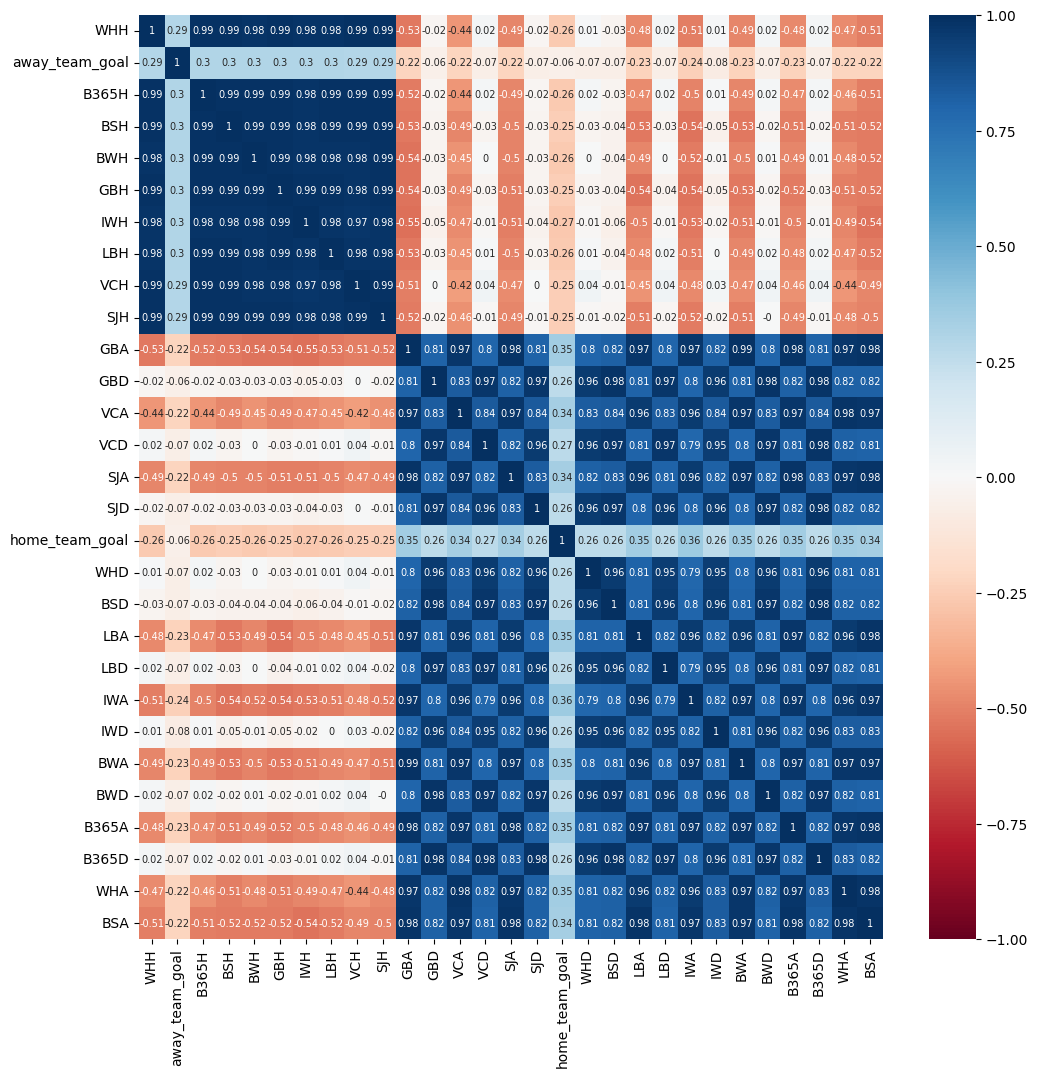

In [ ]:
plt.figure(figsize = (12, 12))
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(Match_no_player.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(Match_no_player[i])
    else:
        df_to_append = pd.DataFrame(Match_no_player[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)
  
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

##### unclustered correlation

<Axes: >

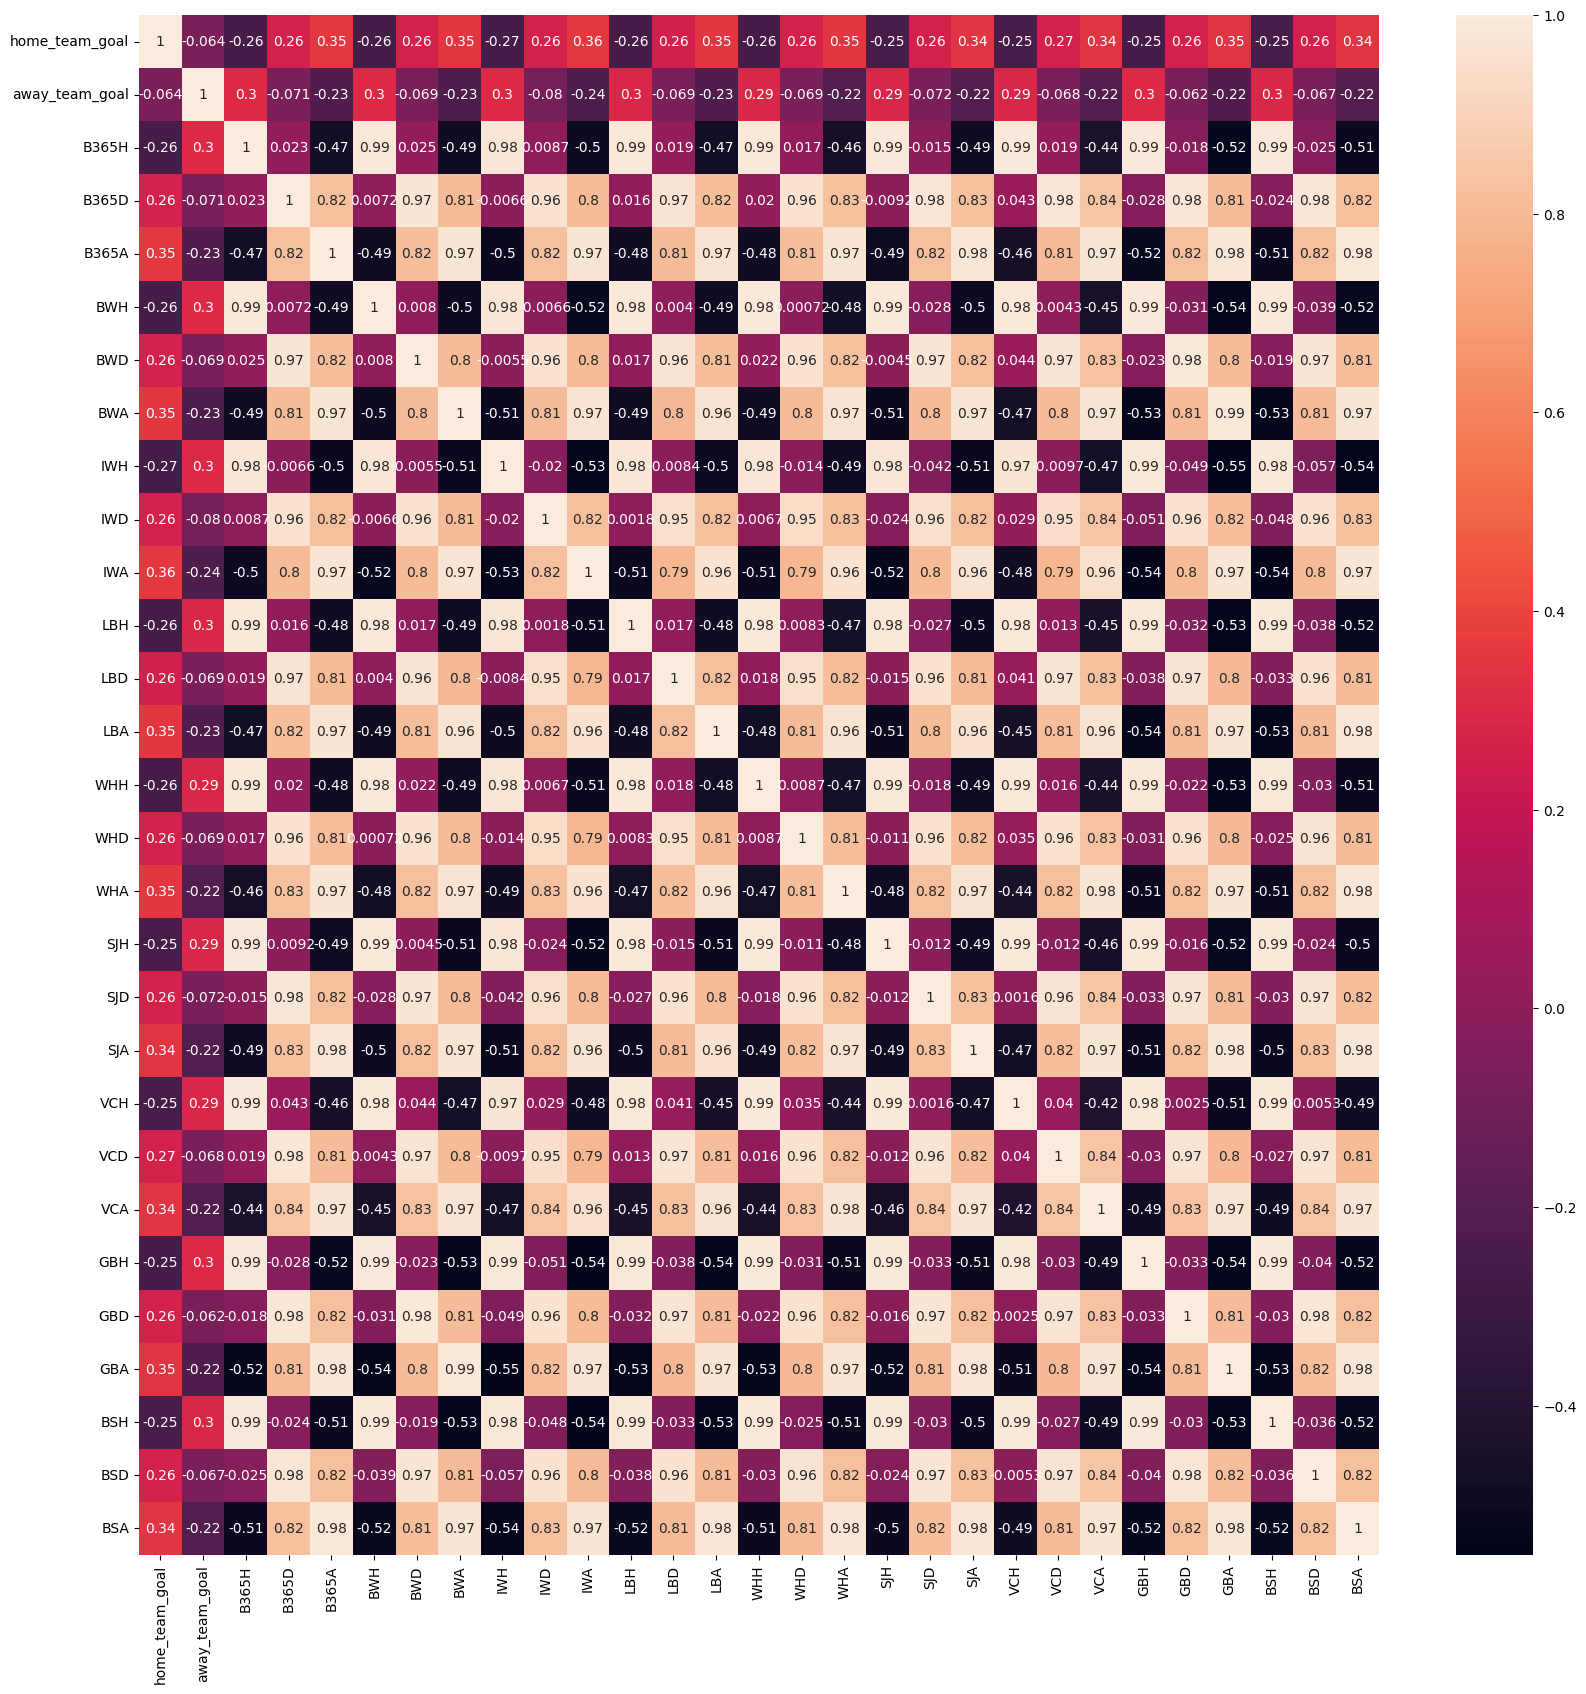

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(Match_no_player.corr(), annot = True)

### Match result distribution 

In [ ]:
# Visulize the match result ,which is a little imbalanced  
sns.histplot(Match['result'])

From the plot above, it shows us that the Home team may have more chance to win